In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display_html

Importing and Visualizing Initial Dataset

In [3]:
data = pd.read_csv('owid-covid-data.csv')
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Looking into number of missing values for important features being analyzed

In [4]:
print(data['total_cases'].isnull().sum())
print(data['population_density'].isnull().sum())

6352
19429


Seeing the "geographical locations" that need to be analyzed

In [27]:
print(data['continent'].unique().tolist())
print(data[data.continent == 'Asia']['location'].nunique())
print(data[data.continent == 'Europe']['location'].nunique())
print(data[data.continent == 'Africa']['location'].nunique())
print(data[data.continent == 'North America']['location'].nunique())
print(data[data.continent == 'South America']['location'].nunique())
print(data[data.continent == 'Oceania']['location'].nunique())

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
50
51
55
37
13
23


Append 'month' and 'year' columns in order to allow for easier analysis and access to dates later on

In [6]:
data['month'] = pd.to_datetime(data['date']).dt.month
data['year'] = pd.to_datetime(data['date']).dt.year

"Pre-implement" dfVisualize() function to allow for visualization of new dataframes created during analyses

In [7]:
def dfVisualize(df1, df2, df3, df4, df5, df6):

    display_html(df1._repr_html_()+df2._repr_html_(), raw=True)
    display_html(df3._repr_html_()+df4._repr_html_(), raw=True)
    display_html(df5._repr_html_()+df6._repr_html_(), raw=True)

## Analysis 1

In [8]:
data['total_cases'] = data['total_cases'].fillna(0)

### Initializing and Visualizing New Dataframes

newDF() creates a new dataframe for each continent and its month from the years 2020 to 2022 with regards to the total number of covid cases.

In [9]:
def total_casesDf(continent):

    tempDf = {'Months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
            2020: [0,0,0,0,0,0,0,0,0,0,0,0],
            2021: [0,0,0,0,0,0,0,0,0,0,0,0],
            2022: [0,0,0,0,0,0,0,0,0,0,0,0]
            }

    df = pd.DataFrame(tempDf)

    for i in range(3):
        for j in range(12):
            month = (continent.month == j+1) & (continent.year == 2020+i)
            month = month.tolist()

            total_temp = 0
            for k in range(len(month)-1):
                if ((month[k] == True and month[k+1] == False) and (continent['location'].values[k] == continent['location'].values[k+1])):
                    total_temp += continent['total_cases'].values[k]
                elif ((month[k] == True and month[k+1] == True) and (continent['location'].values[k] != continent['location'].values[k+1])):
                    total_temp += continent['total_cases'].values[k]
                elif(month[k] == True) and (continent['location'].values[k] != continent['location'].values[k+1]):
                    total_temp += continent['total_cases'].values[k]
            
            df.at[j, 2020+i] = total_temp

    df.columns = df.columns.astype(str)
    
    df['2022'] = df['2022'].replace(0, np.nan)


    return df

First a general total covid cases analysis is made for each continent to see the overall trend of covid based on geography, not including specific factors such as economy, population (density) and tourism.

In [10]:
africa1 = total_casesDf(data[data.continent == 'Africa'])
asia1 = total_casesDf(data[data.continent == 'Asia'])
nAmerica1 = total_casesDf(data[data.continent == 'North America'])
sAmerica1 = total_casesDf(data[data.continent == 'South America'])
oceania1 = total_casesDf(data[data.continent == 'Oceania'])
europe1 = total_casesDf(data[data.continent == 'Europe'])

In [28]:
africa_tCasesDF = africa1.style.set_table_attributes("style='display:inline'").set_caption('Africa')
asia_tCasesDF = asia1.style.set_table_attributes("style='display:inline'").set_caption('Asia')
nAmerica_tCasesDF = nAmerica1.style.set_table_attributes("style='display:inline'").set_caption('North America')
sAmerica_tCasesDF = sAmerica1.style.set_table_attributes("style='display:inline'").set_caption('South America')
oceania_tCasesDF = oceania1.style.set_table_attributes("style='display:inline'").set_caption('Oceania')
europe_tCasesDF = europe1.style.set_table_attributes("style='display:inline'").set_caption('Europe')

dfVisualize(africa_tCasesDF, asia_tCasesDF, nAmerica_tCasesDF, sAmerica_tCasesDF, oceania_tCasesDF, europe_tCasesDF)

,Months,2020,2021,2022
0,January,0,3569601,10887086.000000
1,February,3,3897281,11333186.000000
2,March,5761,4217242,11558935.000000
3,April,38753,4557665,11340320.000000
4,May,146551,4840335,nan
5,June,404891,5504517,nan
6,July,928075,6709345,nan
7,August,1252228,7790398,nan
8,September,1481930,8310766,nan
9,October,1785475,8504545,nan


,Months,2020,2021,2022
0,January,12,30181886,87922944.000000
1,February,62,33040358,93071429.000000
2,March,207420,35261763,94619620.000000
3,April,1171712,37666786,95054065.000000
4,May,2021459,39038005,nan
5,June,3101947,39819103,nan
6,July,5362713,41905489,nan
7,August,7189505,47309260,nan
8,September,8686897,52382624,nan
9,October,10983531,55358506,nan


,Months,2020,2021,2022
0,January,9,50165,2769259.000000
1,February,26,51171,3594547.000000
2,March,5264,57060,5518494.000000
3,April,8347,62905,6163659.000000
4,May,8811,68626,nan
5,June,9560,74526,nan
6,July,19025,105425,nan
7,August,28654,164021,nan
8,September,31389,230816,nan
9,October,37478,317489,nan


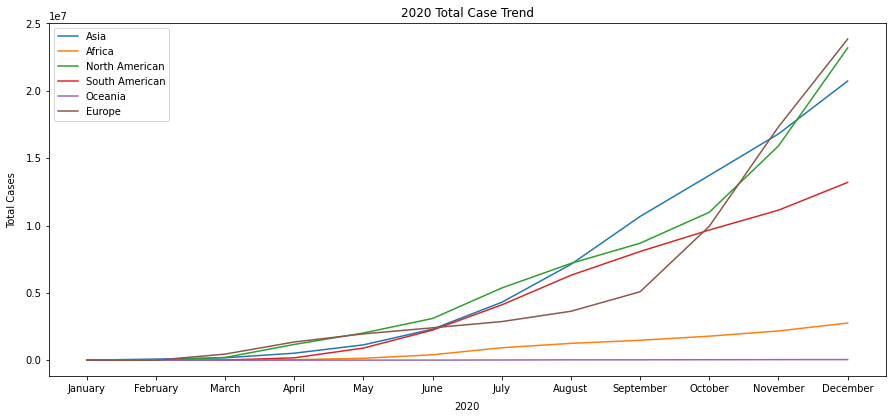

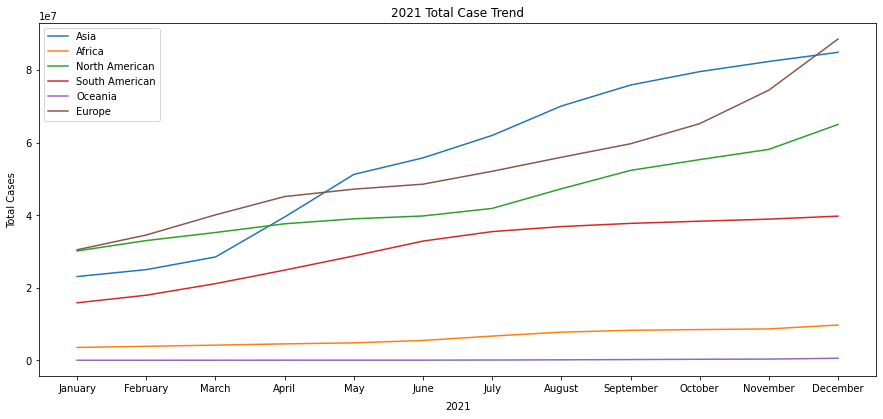

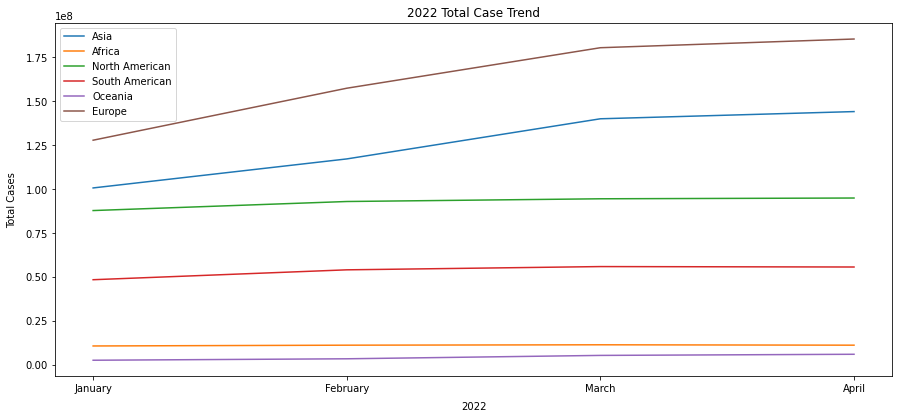

In [12]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(15,6.5))

    year = 2020+i
    year = str(year)
    
    plt.plot(asia1['Months'], asia1[year], label = 'Asia')
    plt.plot(africa1['Months'], africa1[year], label = 'Africa')
    plt.plot(nAmerica1['Months'], nAmerica1[year], label = 'North American')
    plt.plot(sAmerica1['Months'], sAmerica1[year], label = 'South American')
    plt.plot(oceania1['Months'], oceania1[year], label = 'Oceania')
    plt.plot(europe1['Months'], europe1[year], label = 'Europe')


    plt.title("{} Total Case Trend".format(year))
    plt.xlabel(year,labelpad=8.5)
    plt.ylabel("Total Cases", labelpad=8.5)

    plt.legend()
    plt.show()

As can be seen above, Asia and Europe have maintained a consistently high number of total cases since the beginning of the pandemic at the beginning of 2020. Such a trend is dependent on a multitude of factors as mentioned previously, one of which is quite a significant and crucial factor in any pandemic, population or more precisely the population density in a given location, in this case being continent's which we are analysing. 

## Analysis 2

Next we can analyse the percentage of population for each continent with respect to the number of covid cases. This is a crucial investigation because for instance if Country A has a population of 100 and has 50 total cases whereas Country B has a population of 10 and 9 total cases, the prevalence of Covid cases with respect to the population of the country will be far larger for Country B. More specifically, one must examine the percentile of the total population that have contracted covid rather than the total case count.

covid_percentile() creates a new dataframe for each continent with regards to the percentile of the total population which have contracted Covid each month from the beginning of the pandemic

In [13]:
def covid_percentile(continent, temp_fix):

    tempDf = {'Months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
            '2020': [0,0,0,0,0,0,0,0,0,0,0,0],
            '2021': [0,0,0,0,0,0,0,0,0,0,0,0],
            '2022': [0,0,0,0,0,0,0,0,0,0,0,0]
            }


    df = pd.DataFrame(tempDf)

    cols = df.columns.drop('Months')

    df[cols] = df[cols].astype(float)


    for i in range(3):
        for j in range(12):
            month = (continent.month == j+1) & (continent.year == 2020+i)
            month = month.tolist()

            total_pop = 0
            total_case = 0
            for k in range(len(month)-1):
                if ((month[k] == True and month[k+1] == False) and (continent['location'].values[k] == continent['location'].values[k+1])):
                    total_pop += continent['population'].values[k]
                    total_case += continent['total_cases'].values[k]
                elif ((month[k] == True and month[k+1] == True) and (continent['location'].values[k] != continent['location'].values[k+1])):
                    total_pop += continent['population'].values[k]
                    total_case += continent['total_cases'].values[k]
                elif(month[k] == True) and (continent['location'].values[k] != continent['location'].values[k+1]):
                    total_pop += continent['population'].values[k]
                    total_case += continent['total_cases'].values[k]
            
            #Temporary fix for total population 'nan' result for asia calculation
            if(temp_fix):
                total_pop = 4646498154.0

            if total_case == 0:
                percentile = 0
            else: 
                percentile = (total_case/total_pop)*100

            
            if i == 0:
                df.at[j, '2020'] = percentile

            elif i == 1:
                df.at[j, '2021'] = percentile

            else: df.at[j, '2022'] = percentile

    df['2022'] = df['2022'].replace(0, np.nan)

    
    return df

In [14]:
africa2 = covid_percentile(data[data.continent == 'Africa'], 0)
asia2 = covid_percentile(data[data.continent == 'Asia'], 1)
nAmerica2 = covid_percentile(data[data.continent == 'North America'], 0)
sAmerica2 = covid_percentile(data[data.continent == 'South America'], 0)
oceania2 = covid_percentile(data[data.continent == 'Oceania'], 0)
europe2 = covid_percentile(data[data.continent == 'Europe'], 0)

In [15]:
africa_tCasesDF = africa2.style.set_table_attributes("style='display:inline'").set_caption('Africa Percentile of Population Infected: ' + str(data[data.continent == 'Africa']['location'].nunique()) + ' countries')
asia_tCasesDF = asia2.style.set_table_attributes("style='display:inline'").set_caption('Asia Percentile of Population Infected: ' + str(data[data.continent == 'Asia']['location'].nunique()) + ' countries')
nAmerica_tCasesDF = nAmerica2.style.set_table_attributes("style='display:inline'").set_caption('North Percentile of Population Infected: ' + str(data[data.continent == 'North America']['location'].nunique()) + ' countries')
sAmerica_tCasesDF = sAmerica2.style.set_table_attributes("style='display:inline'").set_caption('South Percentile of Population Infected: ' + str(data[data.continent == 'South America']['location'].nunique()) + ' countries')
oceania_tCasesDF = oceania2.style.set_table_attributes("style='display:inline'").set_caption('Oceania Percentile of Population Infected: ' + str(data[data.continent == 'Oceania']['location'].nunique()) + ' countries')
europe_tCasesDF = europe2.style.set_table_attributes("style='display:inline'").set_caption('Europe Percentile of Population Infected: ' + str(data[data.continent == 'Europe']['location'].nunique()) + ' countries')

dfVisualize(africa_tCasesDF, asia_tCasesDF, nAmerica_tCasesDF, sAmerica_tCasesDF, oceania_tCasesDF, europe_tCasesDF)

,Months,2020,2021,2022
0,January,0.000000,0.260233,0.793697
1,February,0.000001,0.284122,0.826219
2,March,0.000425,0.307448,0.842676
3,April,0.002830,0.332266,0.835936
4,May,0.010684,0.352873,nan
5,June,0.029518,0.401294,nan
6,July,0.067659,0.489129,nan
7,August,0.091291,0.567940,nan
8,September,0.108037,0.605876,nan
9,October,0.130166,0.620003,nan


,Months,2020,2021,2022
0,January,0.000002,5.066422,14.757934
1,February,0.000012,5.546254,15.622111
2,March,0.034820,5.919146,15.881976
3,April,0.196687,6.322860,15.957690
4,May,0.339328,6.552559,nan
5,June,0.520702,6.683667,nan
6,July,0.900201,7.033869,nan
7,August,1.206852,7.940896,nan
8,September,1.458209,8.792464,nan
9,October,1.843729,9.291968,nan


,Months,2020,2021,2022
0,January,0.000034,0.116282,6.386770
1,February,0.000082,0.118614,8.290140
2,March,0.012630,0.132264,12.727358
3,April,0.020000,0.145377,14.223043
4,May,0.021082,0.158090,nan
5,June,0.022874,0.171670,nan
6,July,0.045520,0.242845,nan
7,August,0.068559,0.377663,nan
8,September,0.075102,0.531460,nan
9,October,0.088163,0.731028,nan


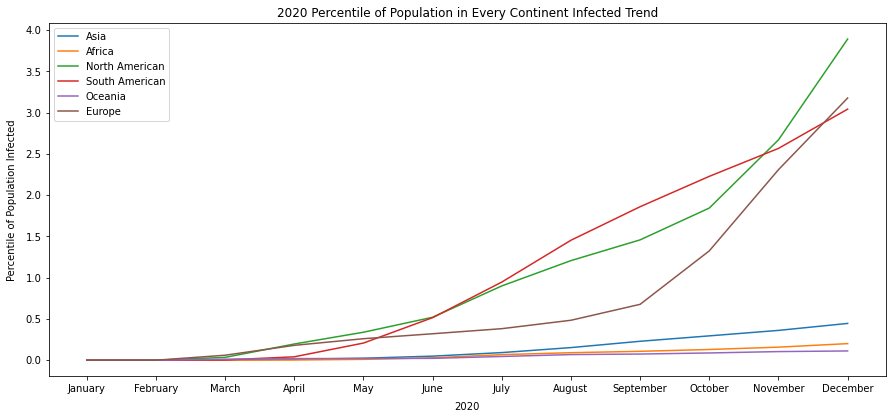

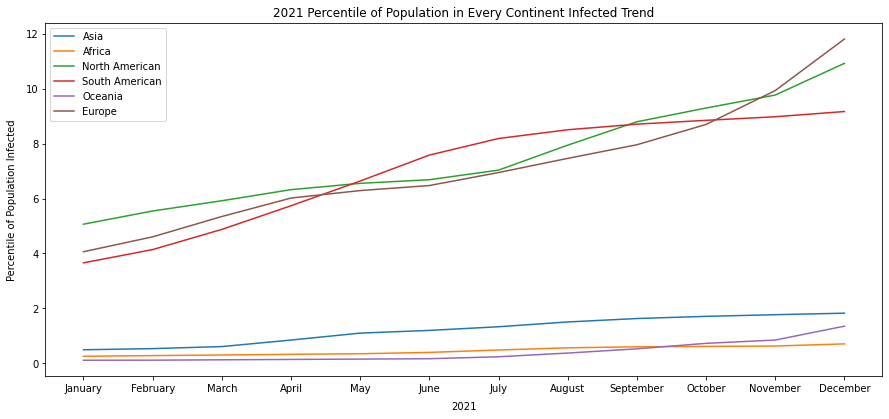

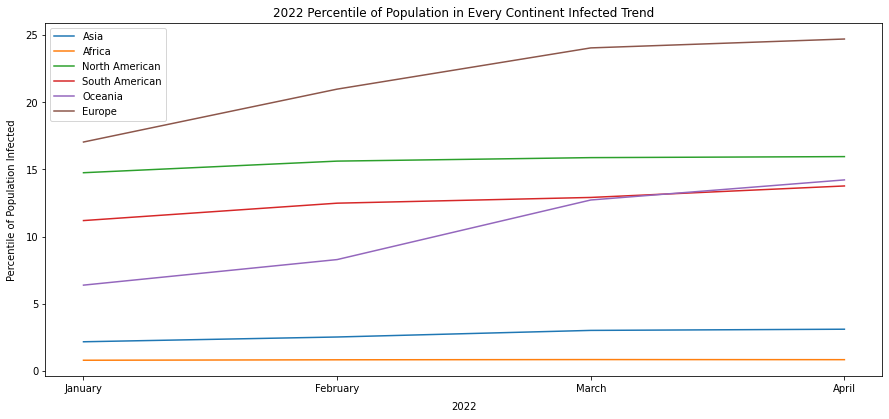

In [16]:
for i in range(3):

    fig, ax = plt.subplots(figsize=(15,6.5))

    year = 2020+i
    year = str(year)
    
    plt.plot(asia2['Months'], asia2[year], label = 'Asia')
    plt.plot(africa2['Months'], africa2[year], label = 'Africa')
    plt.plot(nAmerica2['Months'], nAmerica2[year], label = 'North American')
    plt.plot(sAmerica2['Months'], sAmerica2[year], label = 'South American')
    plt.plot(oceania2['Months'], oceania2[year], label = 'Oceania')
    plt.plot(europe2['Months'], europe2[year], label = 'Europe')


    plt.title("{} Percentile of Population in Every Continent Infected Trend".format(year))
    plt.xlabel(year,labelpad=8.5)
    plt.ylabel("Percentile of Population Infected", labelpad=8.5)

    plt.legend()
    plt.show()

Ultimately, as can be seen the correlation and relationship has changed compared to the first analysis. Now that we are more closely analyzing the population of the continents, North America and Europe are observered to lead this trend with more of their total populations having had contracted Covid. In the previous analysis, Asia had mainly dominated this trend with their total cases surpassing all other locations. Nevertheless, this second analysis demonstrates the importance of how the population and especially the land area with respect to the population affects the probability of contracting Covid.

## Future Improvements for Analysis

- 